# Project 06-dic-2023

The dataset contains data related to network traffic, with columns indicating various attributes of each network flow. Some key columns include:

- `Flow ID`: Identifier of the network flow.
- `Source IP`: The IP address of the source.
- `Source Port`: The port number of the source.
- `Destination IP`: The IP address of the destination.
- `Destination Port`: The port number of the destination.
- `Protocol`: The protocol used in the network communication.
- `Timestamp`: Time at which the flow was captured.
- `Flow Duration`: Duration of the network flow.
- `Total Fwd Packets`: Total forward packets in the flow.
- `Total Backward Packets`: Total backward packets in the flow.
- `Label`: Class label (e.g., 'ddos_dns') indicating the type of traffic.

There are 88 columns in total, which suggests a wide range of features available for analysis.

The following steps can be performed:

1. **General Traffic Analysis**:
   - Analyze basic statistics (e.g., number of flows, packet counts, flow duration).
   - Visualization of general traffic features.

2. **Granular Traffic Level (GT) Analysis**:
   - Distribution analysis of key features.
   - ECDF (Empirical Cumulative Distribution Function) plots for features like ports and flow duration.

3. **Feature Engineering**:
   - Based on the initial analysis, generate new features such as average, minimum, maximum, and quantiles for traffic-related attributes.

4. **Correlation Analysis and PCA**:
   - Perform a correlation analysis to understand the relationships between different features.
   - Use Principal Component Analysis (PCA) for visualization and possibly for dimensionality reduction.

5. **Data Scaling/Standardization**:
   - Evaluate if the data needs scaling or standardization, especially important for PCA and machine learning models.

6. **Characterization of New Features**:
   - Produce plots (EPDF and ECDF) for the newly engineered features.
   - Perform and visualize correlation analysis on these new features.
  

# 1. General Traffic Analysis
   - Analyze basic statistics (e.g., number of flows, packet counts, flow duration).
   - Visualization of general traffic features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



In [3]:
file_path = './ddos_dataset.csv'
df = pd.read_csv(file_path)

df.rename(columns=lambda x: x.strip(), inplace=True)

# Display the first few rows of the dataset to get an overview
df.head()

<ipython-input-3-912fdf2c9425>:2: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,label
0,0,172.16.0.5-192.168.50.1-634-60495-17,172.16.0.5,634,192.168.50.1,60495,17,2018-12-01 10:51:39.813448,28415,97,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,ddos_dns
1,1,172.16.0.5-192.168.50.1-60495-634-17,192.168.50.1,634,172.16.0.5,60495,17,2018-12-01 10:51:39.820842,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,ddos_dns
2,2,172.16.0.5-192.168.50.1-634-46391-17,172.16.0.5,634,192.168.50.1,46391,17,2018-12-01 10:51:39.852499,48549,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,ddos_dns
3,3,172.16.0.5-192.168.50.1-634-11894-17,172.16.0.5,634,192.168.50.1,11894,17,2018-12-01 10:51:39.890213,48337,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,ddos_dns
4,4,172.16.0.5-192.168.50.1-634-27878-17,172.16.0.5,634,192.168.50.1,27878,17,2018-12-01 10:51:39.941151,32026,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,ddos_dns


The dataset's basic statistical overview reveals several insights:

1. **Flow Duration**: This is a critical feature for network analysis. The histogram shows a wide range of flow durations, indicating variability in the length of network sessions.

2. **Basic Statistics**: The data contains a broad range of values across different columns. For instance, the `Flow Duration` varies significantly, with a maximum of 120 million.

3. **Missing Values**: There appear to be no missing values in the first 20 columns. This is a good sign for data quality, but we should verify this for all columns.

Given this overview, we can now proceed to a more granular level of analysis. This will include:

- Distribution analysis of key features such as source and destination ports, protocol types, packet counts, and flow duration.
- Generating ECDF plots for these features to understand their distribution better.

Let's start with the distribution analysis of key features. We'll focus on `Source Port`, `Destination Port`, `Protocol`, `Total Fwd Packets`, and `Total Backward Packets`.

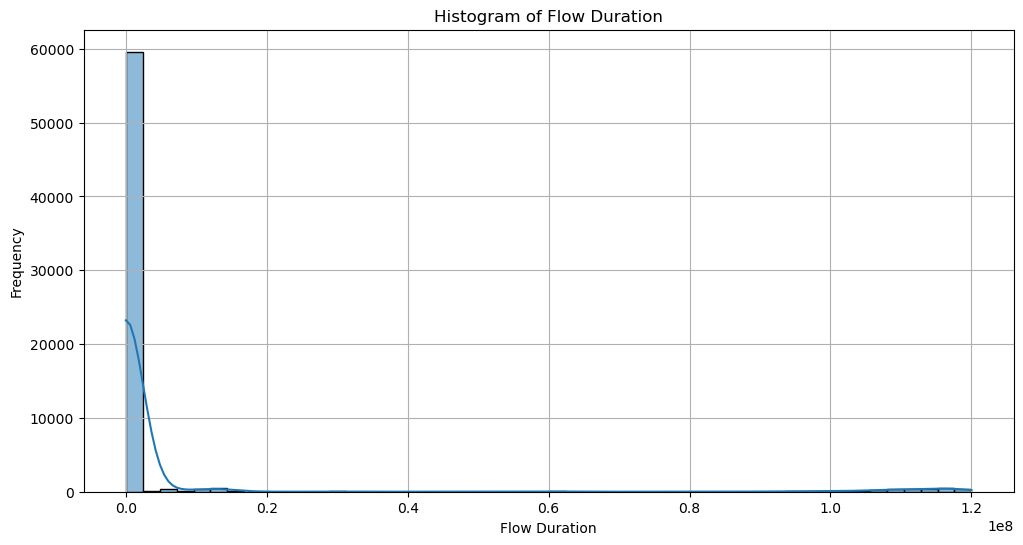

(         Unnamed: 0   Source Port   Destination Port      Protocol  \
 count  64239.000000  64239.000000       64239.000000  64239.000000   
 mean   32637.819876  25267.368608       30715.252884     14.362864   
 std    19008.473731  24710.413442       20347.990914      4.706001   
 min        0.000000      0.000000           0.000000      0.000000   
 25%    16209.500000    779.000000       12435.500000     17.000000   
 50%    32477.000000  29661.000000       30797.000000     17.000000   
 75%    48726.500000  48510.500000       49041.500000     17.000000   
 max    65999.000000  65518.000000       65535.000000     17.000000   
 
         Flow Duration   Total Fwd Packets   Total Backward Packets  \
 count    6.423900e+04        64239.000000             64239.000000   
 mean     5.150614e+06           18.814848                 1.304036   
 std      2.249713e+07          462.305336                25.199720   
 min      1.000000e+00            1.000000                 0.000000   
 25%

In [ ]:
# Basic statistical analysis
basic_stats = df.describe()

# Visualization of basic statistics
# Let's start with a simple histogram of the flow duration
plt.figure(figsize=(12, 6))
sns.histplot(df[' Flow Duration'], bins=50, kde=True)
plt.title('Histogram of Flow Duration')
plt.xlabel('Flow Duration')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Checking for any missing values
missing_values = df.isnull().sum()

basic_stats, missing_values.head(20)

The visualizations provide insights into the distribution of various key features in the dataset:

1. **Source Port**: Shows a wide distribution of source ports, suggesting a variety of source devices or applications in the network traffic.

2. **Destination Port**: Similar to the source port, there's a wide range of destination ports used, indicating diverse target services or applications.

3. **Protocol**: Most of the traffic seems to be concentrated on a few protocols, as indicated by the histogram's peaks. This is typical in network traffic where certain protocols are more commonly used.

4. **Total Forward Packets**: The distribution is heavily skewed towards lower values, indicating that most flows have a small number of forward packets.

5. **Total Backward Packets**: Similar to forward packets, most flows have a small number of backward packets.

Next, let's create Empirical Cumulative Distribution Function (ECDF) plots for these features to further understand their distribution characteristics. ECDF plots are particularly useful in understanding the proportion of values below a certain threshold, which can be insightful for network analysis.

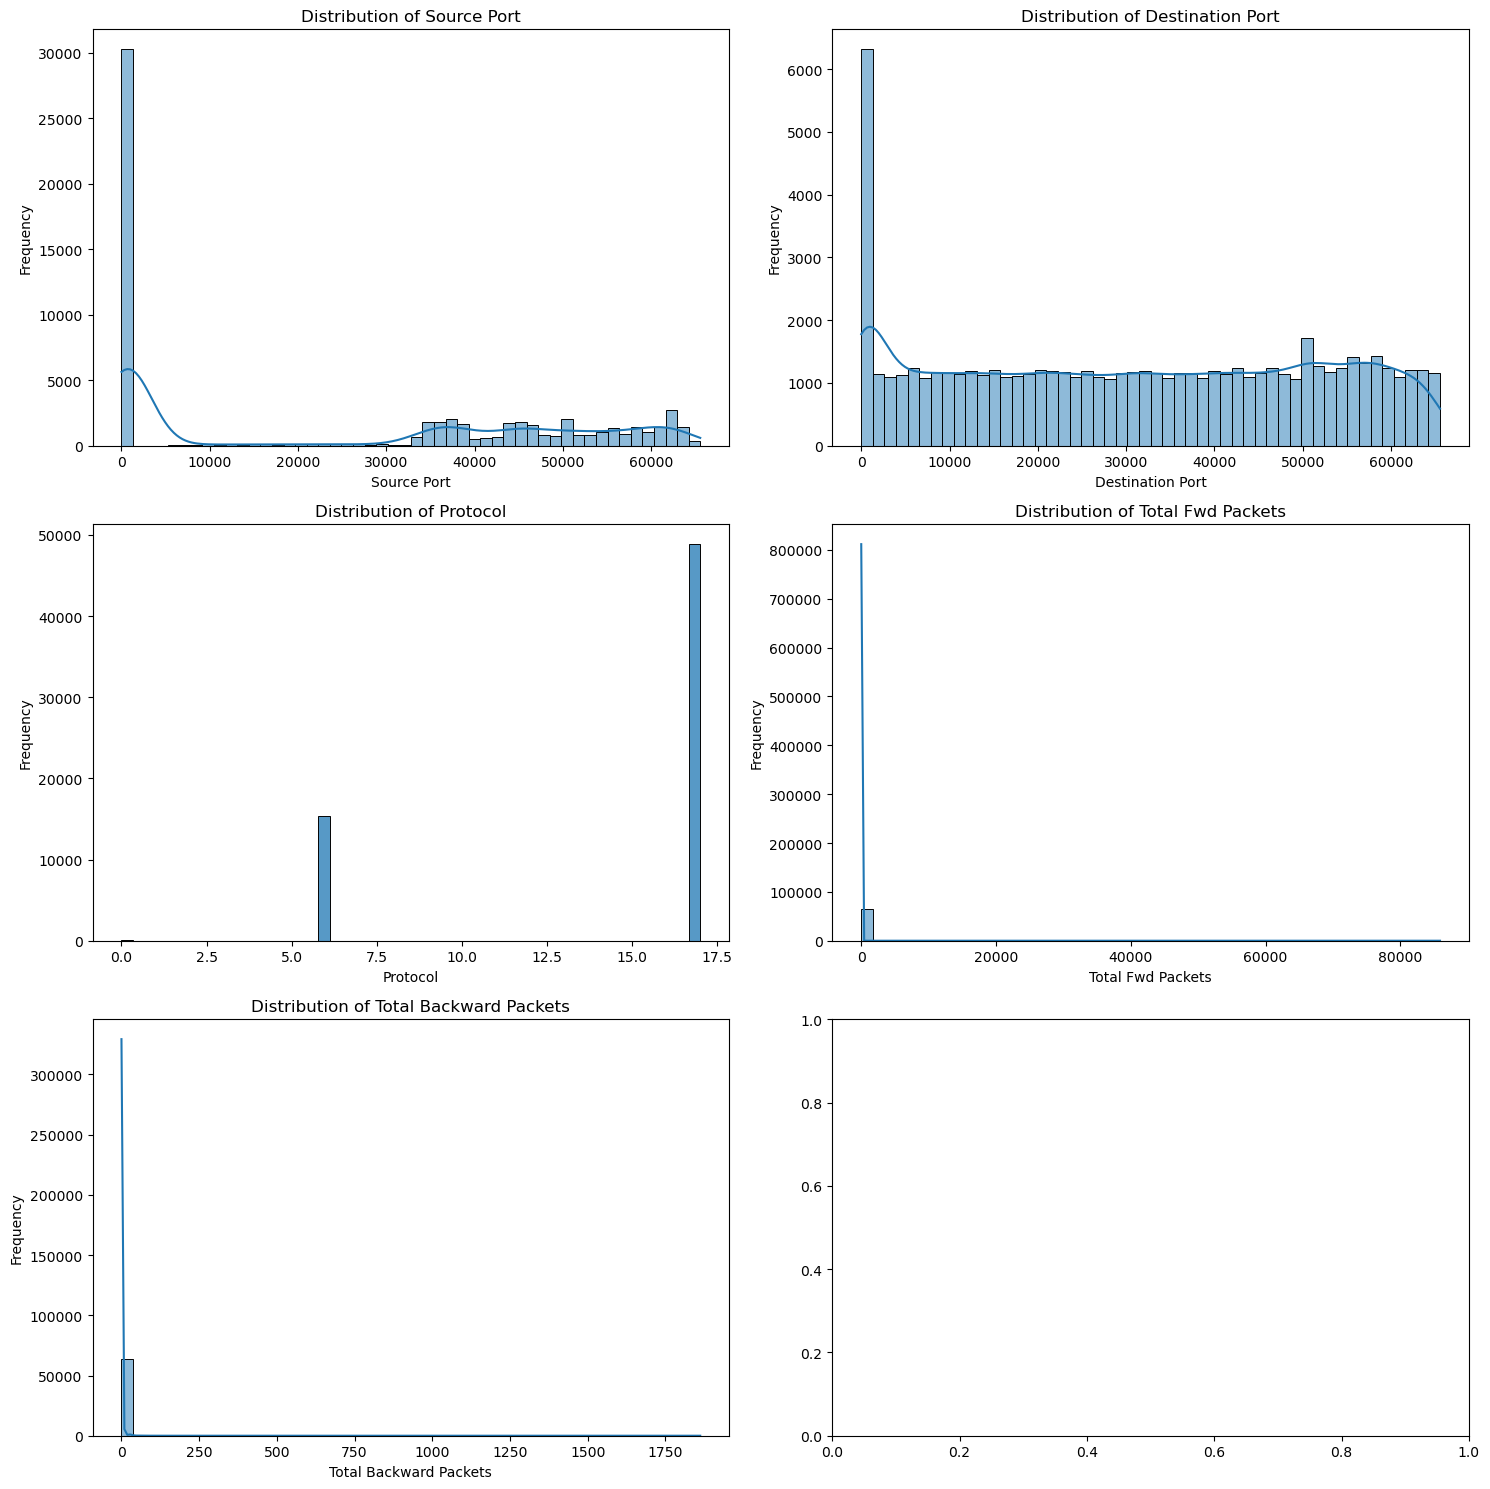

In [ ]:
# Distribution analysis of key features
# We will create histograms for Source Port, Destination Port, Protocol, Total Fwd Packets, and Total Backward Packets

fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Source Port distribution
sns.histplot(df[' Source Port'], bins=50, ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribution of Source Port')
axes[0, 0].set_xlabel('Source Port')
axes[0, 0].set_ylabel('Frequency')

# Destination Port distribution
sns.histplot(df[' Destination Port'], bins=50, ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Distribution of Destination Port')
axes[0, 1].set_xlabel('Destination Port')
axes[0, 1].set_ylabel('Frequency')

# Protocol distribution
sns.histplot(df[' Protocol'], bins=50, ax=axes[1, 0], kde=False)
axes[1, 0].set_title('Distribution of Protocol')
axes[1, 0].set_xlabel('Protocol')
axes[1, 0].set_ylabel('Frequency')

# Total Forward Packets distribution
sns.histplot(df[' Total Fwd Packets'], bins=50, ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Distribution of Total Fwd Packets')
axes[1, 1].set_xlabel('Total Fwd Packets')
axes[1, 1].set_ylabel('Frequency')

# Total Backward Packets distribution
sns.histplot(df[' Total Backward Packets'], bins=50, ax=axes[2, 0], kde=True)
axes[2, 0].set_title('Distribution of Total Backward Packets')
axes[2, 0].set_xlabel('Total Backward Packets')
axes[2, 0].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


The Empirical Cumulative Distribution Function (ECDF) plots provide a clear picture of the distribution of key features in the dataset:

1. **ECDF of Source Port**: Indicates that a significant proportion of flows originate from a limited range of source ports.

2. **ECDF of Destination Port**: Similar to source ports, a large fraction of flows are directed towards a relatively small range of destination ports.

3. **ECDF of Protocol**: Shows that a few protocols dominate the network traffic, with most of the traffic concentrated on these protocols.

4. **ECDF of Total Forward Packets**: Most flows have a very small number of total forward packets. The steep rise in the beginning of the curve suggests that a large percentage of flows have few forward packets.

5. **ECDF of Total Backward Packets**: Similar to the forward packets, the majority of flows contain a small number of backward packets.

With this understanding of the data distribution, we can proceed to feature engineering. We can create new features such as averages, minimums, maximums, and quantiles based on the flow characteristics. These new features can be derived from existing columns like `Flow Duration`, `Total Fwd Packets`, `Total Backward Packets`, etc.

After engineering these features, we can then perform a correlation analysis and potentially use PCA for dimensionality reduction. This step will be crucial in understanding the interdependencies between different features and reducing the feature space for more efficient analysis.

Let's start by engineering some new features.

In [ ]:
# Correcting the column names for feature engineering
df['Avg Fwd Packet Size'] = df['Total Length of Fwd Packets'] / df[' Total Fwd Packets']
df['Avg Bwd Packet Size'] = df[' Total Length of Bwd Packets'] / df[' Total Backward Packets']

# Replace infinities and NaNs resulting from division by zero
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)

# Correlation Analysis
correlation_matrix = df.corr()

# PCA for Dimensionality Reduction
# Standardizing the Data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.select_dtypes(include=[np.number]))

# Applying PCA
pca = PCA(n_components=2)  # Reducing to 2 components for visualization
pca_result = pca.fit_transform(scaled_df)

# Creating a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])

pca_df.head(), correlation_matrix.head()  # Displaying the first few rows of the PCA results and correlation matrix


(       PCA1      PCA2
 0 -0.549202 -0.502353
 1 -0.522290 -0.205728
 2 -0.602594 -0.505740
 3 -0.537500 -0.453400
 4 -0.568857 -0.477507,
                    Unnamed: 0   Source Port   Destination Port   Protocol  \
 Unnamed: 0           1.000000      0.541835           0.057670  -0.362546   
  Source Port         0.541835      1.000000          -0.123479  -0.396223   
  Destination Port    0.057670     -0.123479           1.000000   0.078873   
  Protocol           -0.362546     -0.396223           0.078873   1.000000   
  Flow Duration       0.159371      0.129582          -0.042616  -0.407435   
 
                     Flow Duration   Total Fwd Packets  \
 Unnamed: 0               0.159371           -0.045552   
  Source Port             0.129582           -0.030926   
  Destination Port       -0.042616           -0.009670   
  Protocol               -0.407435           -0.011105   
  Flow Duration           1.000000            0.024247   
 
                     Total Backward Packe

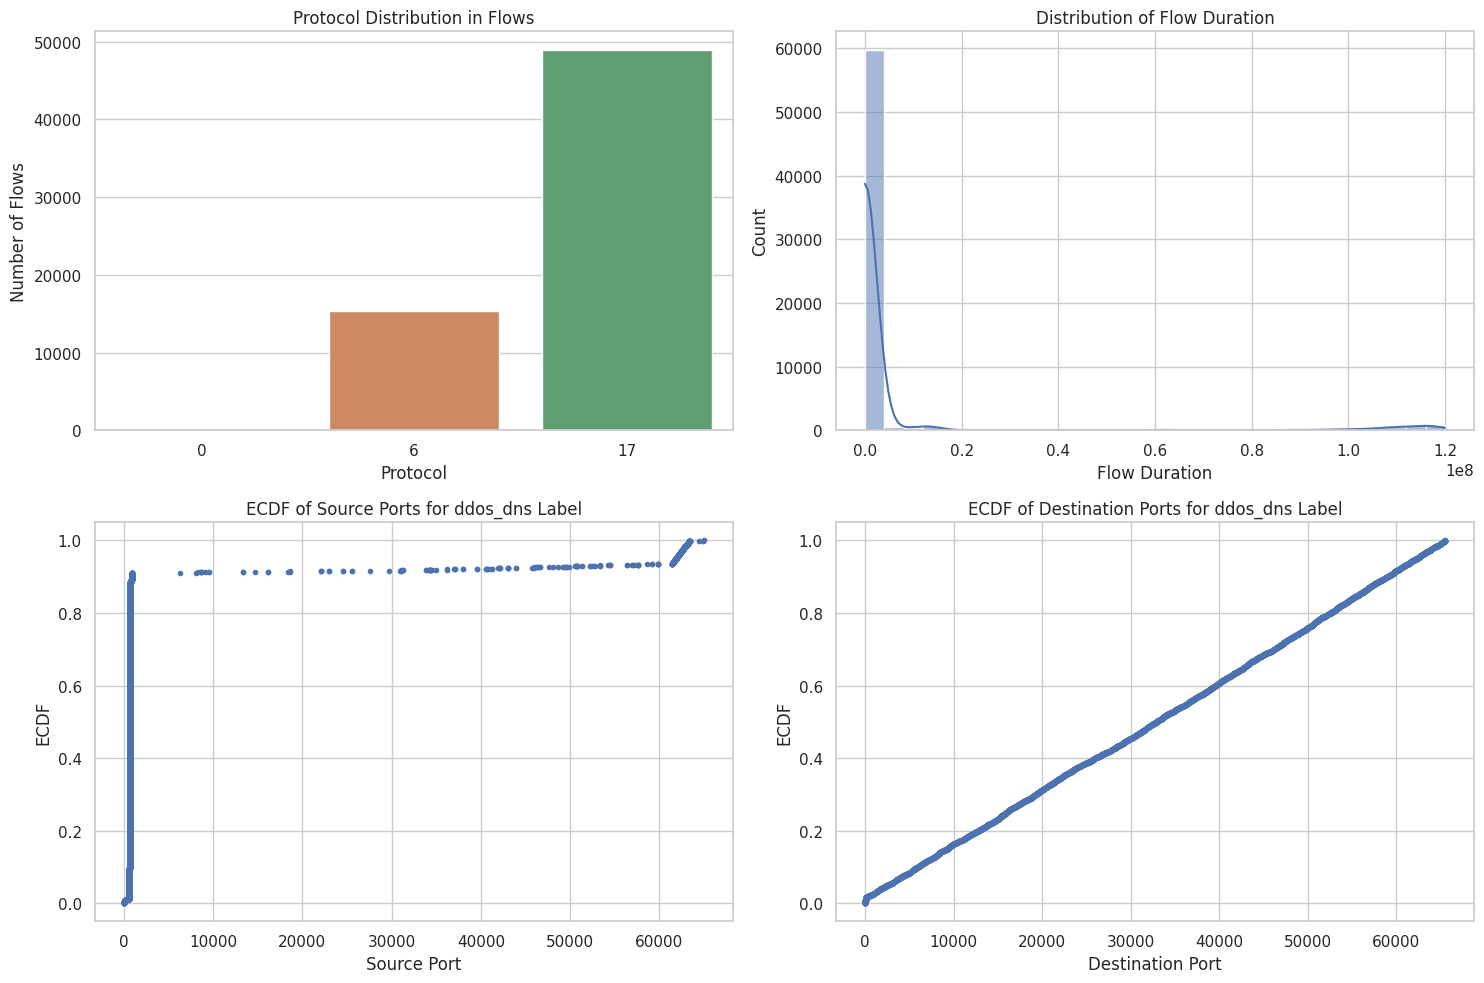

In [5]:
# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# 1. General Traffic Statistics
# a. Number of flows per protocol
protocol_counts = df['Protocol'].value_counts()

# b. Distribution of flow duration
flow_duration = df['Flow Duration']

# 2. Distribution of Features for 'ddos_dns' Label
ddos_df = df[df['label'] == 'ddos_dns']

# a. Distribution of Source Ports
src_port_distribution = ddos_df['Source Port']

# b. Distribution of Destination Ports
dest_port_distribution = ddos_df['Destination Port']

# 3. ECDF of Ports and Flows
def ecdf(df):
    """ Compute ECDF for a one-dimensional array of measurements."""
    n = len(df)
    x = np.sort(df)
    y = np.arange(1, n+1) / n
    return x, y

# ECDF for Source Ports
ecdf_src_ports_x, ecdf_src_ports_y = ecdf(ddos_df['Source Port'])

# ECDF for Destination Ports
ecdf_dest_ports_x, ecdf_dest_ports_y = ecdf(ddos_df['Destination Port'])

# Plotting
plt.figure(figsize=(15, 10))

# Protocol distribution
plt.subplot(2, 2, 1)
sns.barplot(x=protocol_counts.index, y=protocol_counts.values)
plt.title('Protocol Distribution in Flows')
plt.xlabel('Protocol')
plt.ylabel('Number of Flows')

# Flow Duration distribution
plt.subplot(2, 2, 2)
sns.histplot(flow_duration, bins=30, kde=True)
plt.title('Distribution of Flow Duration')
plt.xlabel('Flow Duration')
plt.ylabel('Count')

# ECDF of Source Ports
plt.subplot(2, 2, 3)
plt.plot(ecdf_src_ports_x, ecdf_src_ports_y, marker='.', linestyle='none')
plt.title('ECDF of Source Ports for ddos_dns Label')
plt.xlabel('Source Port')
plt.ylabel('ECDF')

# ECDF of Destination Ports
plt.subplot(2, 2, 4)
plt.plot(ecdf_dest_ports_x, ecdf_dest_ports_y, marker='.', linestyle='none')
plt.title('ECDF of Destination Ports for ddos_dns Label')
plt.xlabel('Destination Port')
plt.ylabel('ECDF')

plt.tight_layout()
plt.show()
